In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../datasets/SuperStoreUS.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1951 non-null   int64         
 1   Order Priority        1951 non-null   object        
 2   Discount              1951 non-null   float64       
 3   Unit Price            1951 non-null   float64       
 4   Shipping Cost         1951 non-null   float64       
 5   Customer ID           1951 non-null   int64         
 6   Customer Name         1951 non-null   object        
 7   Ship Mode             1951 non-null   object        
 8   Customer Segment      1951 non-null   object        
 9   Product Category      1951 non-null   object        
 10  Product Sub-Category  1951 non-null   object        
 11  Product Container     1951 non-null   object        
 12  Product Name          1951 non-null   object        
 13  Product Base Margi

### 1. Calculate profit margins by various dimensions

In [5]:
profit_by_region = df.groupby('Region')[['Sales', 'Profit']].sum()
profit_by_region['Profit Margin'] = (profit_by_region['Profit'] / profit_by_region['Sales']) * 100

profit_by_order_date = df.groupby('Order Date')[['Sales', 'Profit']].sum()
profit_by_order_date['Profit Margin'] = (profit_by_order_date['Profit'] / profit_by_order_date['Sales']) * 100

profit_by_customer_segment = df.groupby('Customer Segment')[['Sales', 'Profit']].sum()
profit_by_customer_segment['Profit Margin'] = (profit_by_customer_segment['Profit'] / profit_by_customer_segment['Sales']) * 100

profit_by_product_category = df.groupby('Product Category')[['Sales', 'Profit']].sum()
profit_by_product_category['Profit Margin'] = (profit_by_product_category['Profit'] / profit_by_product_category['Sales']) * 100

### 2. Identify products with negative profits


In [20]:
negative_profit = df[df['Profit'] < 0]
print(negative_profit['Profit'].count())

955


### 3. Analyze the impact of discounts on profitability

In [7]:
discount = df.groupby('Discount')[['Profit', 'Sales']].agg(['sum', 'mean'])

discount['Profit Margin'] = (discount[('Profit', 'sum')] / discount[('Sales', 'sum')]) * 100

discount.sort_values(by='Profit Margin', ascending=False)

Profit                  Sales              Profit Margin
                   sum        mean        sum         mean              
Discount                                                                
0.03      59886.172476  311.907148  190490.16   992.136250     31.437935
0.06      31025.760368  174.302025  136042.17   764.281854     22.805988
0.00      29472.378891  177.544451  170539.05  1027.343675     17.281895
0.02      42716.792631  226.014776  250814.89  1327.062910     17.031203
0.05      36108.973347  187.093126  218024.21  1129.659119     16.561910
0.01      23015.237297  122.421475  166350.10   884.840957     13.835421
0.07      12959.156940   73.215576  207753.78  1173.750169      6.237748
0.08       7535.588828   50.574422  132541.71   889.541678      5.685447
0.10       4284.114768   27.639450  104958.36   677.150710      4.081728
0.04      -4665.601061  -25.920006  176710.80   981.726667     -2.640247
0.09     -18024.832649  -99.037542  169874.38   933.375714    -10.610683
0.21        -17.750000  -17.750000     153.87   153.870000    -11.535712
0.17         -9.130000   -9.130000      27.96    27.960000    -32.653791

C:\Users\hp\AppData\Local\Temp\ipykernel_8816\2869142274.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby('Discount_Category').agg({


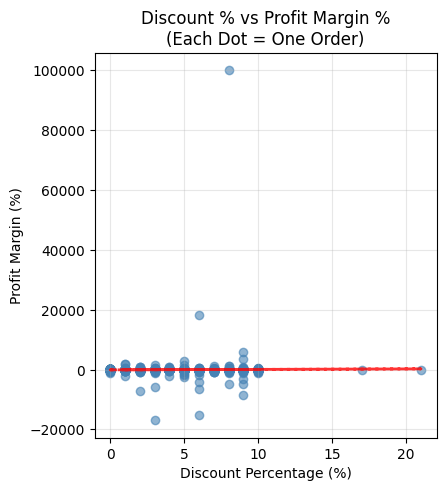

In [11]:
# Create meaningful discount ranges
df['Discount_Category'] = pd.cut(df['Discount'], 
                                bins=[0, 0.1, 0.2, 0.3, 0.5, 1.0], 
                                labels=['No Discount (0%)', 'Low (1-10%)', 'Medium (11-20%)', 
                                       'High (21-30%)', 'Very High (31%+)'],
                                include_lowest=True)

# Show distribution of discount categories

discount_analysis = df.groupby('Discount_Category').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Quantity ordered new': 'sum'
}).round(2)

# Flatten column names
discount_analysis.columns = ['Total_Sales', 'Avg_Sales_Per_Order', 'Order_Count', 
                            'Total_Profit', 'Avg_Profit_Per_Order', 'Total_Quantity']

# Calculate profit margin for each category
discount_analysis['Profit_Margin_%'] = (discount_analysis['Total_Profit'] / discount_analysis['Total_Sales'] * 100).round(2)

# Calculate average order value
discount_analysis['Avg_Order_Value'] = (discount_analysis['Total_Sales'] / discount_analysis['Order_Count']).round(2)

# Calculate profit margin for each individual order
df['Order_Profit_Margin'] = (df['Profit'] / df['Sales'] * 100).round(2)

# Create the scatter plot
plt.figure(figsize=(15, 5))

# Subplot 1: Scatter Plot
plt.subplot(1, 3, 1)
plt.scatter(df['Discount'] * 100, df['Order_Profit_Margin'], alpha=0.6, color='steelblue')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Profit Margin (%)')
plt.title('Discount % vs Profit Margin %\n(Each Dot = One Order)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Discount'] * 100, df['Order_Profit_Margin'], 1)
p = np.poly1d(z)
plt.plot(df['Discount'] * 100, p(df['Discount'] * 100), "r--", alpha=0.8, linewidth=2)

In [15]:
df['Discount_Category'].count()

np.int64(1951)

In [9]:
# Step 1: First, let's understand our discount data
print("Step 1: Understanding Discount Data")
print("-" * 30)
print("Discount Statistics:")
print(df['Discount'].describe())
print(f"\nUnique discount values: {df['Discount'].nunique()}")
print(f"Most common discounts:")
print(df['Discount'].value_counts().head(10))

print("Discount category distribution:")
print(df['Discount_Category'].value_counts())

# Step 3: Calculate metrics by discount categories
print("\nStep 3: Calculating Performance by Discount Category")
print("-" * 30)

print("Performance by Discount Category:")
print(discount_analysis)

Step 1: Understanding Discount Data
------------------------------
Discount Statistics:
count    1951.000000
mean        0.048960
std         0.031378
min         0.000000
25%         0.020000
50%         0.050000
75%         0.075000
max         0.210000
Name: Discount, dtype: float64

Unique discount values: 13
Most common discounts:
Discount
0.05    193
0.03    192
0.02    189
0.01    188
0.09    182
0.04    180
0.06    178
0.07    177
0.00    166
0.10    155
Name: count, dtype: int64
Discount category distribution:
Discount_Category
No Discount (0%)    1949
Low (1-10%)            1
Medium (11-20%)        1
High (21-30%)          0
Very High (31%+)       0
Name: count, dtype: int64

Step 3: Calculating Performance by Discount Category
------------------------------
Performance by Discount Category:
                   Total_Sales  Avg_Sales_Per_Order  Order_Count  \
Discount_Category                                                  
No Discount (0%)    1924099.61               987.22

### 4. Compare profitability across customer segments and regions


In [31]:
Customers = df.groupby('Customer Segment')['Profit'].agg(['sum', 'mean'])
region = df.groupby('Region')['Profit'].agg(['sum', 'mean'])

In [30]:
Customers

sum        mean
Customer Segment Region                           
Consumer         Central   5817.127192   65.360980
                 East     18227.846983  202.531633
                 South     -661.588450   -6.241400
                 West     26511.604548  212.092836
Corporate        Central  23519.199930  108.383410
                 East     30124.425756  212.143843
                 South   -25594.477380 -158.971909
                 West     26395.042696  160.945382
Home Office      Central  26410.449802  165.065311
                 East     17342.064611  163.604383
                 South     8473.257650   83.893640
                 West      2207.748806   21.434454
Small Business   Central  21618.695745  216.186957
                 East     19806.316096  146.713453
                 South     3358.753801   45.388565
                 West     20730.394050  265.774283

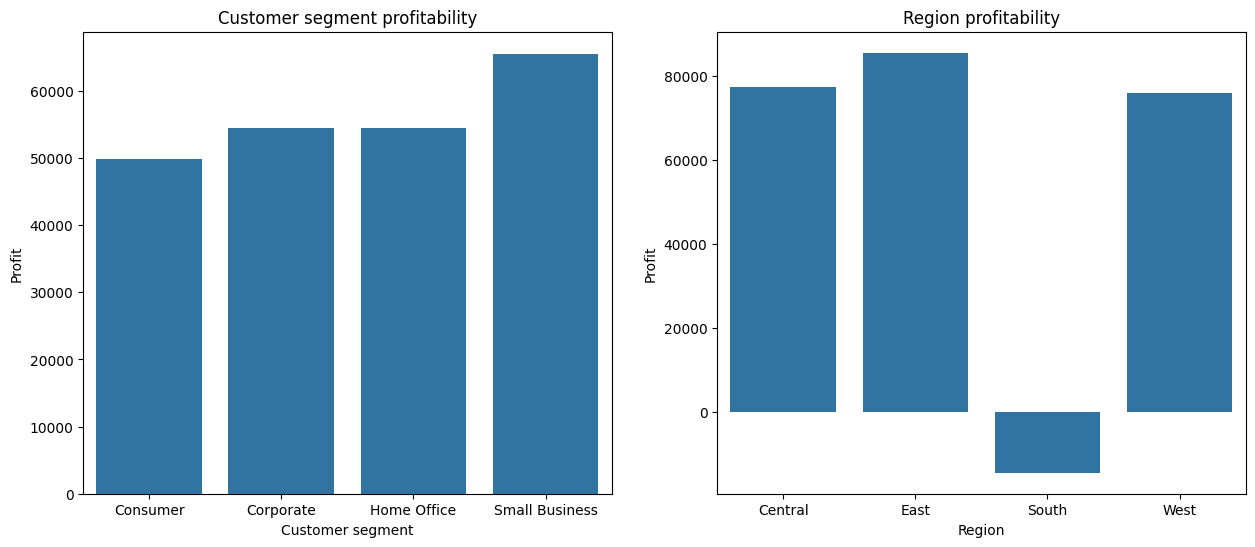

In [32]:
fig ,(ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=Customers, x='Customer Segment', y='sum', ax=ax1)
ax1.set_title('Customer segment profitability')
ax1.set_xlabel('Customer segment')
ax1.set_ylabel('Profit')

sns.barplot(data=region, x='Region', y='sum', ax=ax2)
ax2.set_title('Region profitability')
ax2.set_xlabel('Region')
ax2.set_ylabel('Profit')

plt.show()

🏢 SUPERSTORE PROFITABILITY DASHBOARD
Step 1: Calculating Key Profitability Metrics...
----------------------------------------
✅ Key metrics calculated successfully!

🔍 KEY PROFITABILITY INSIGHTS
💡 Overall Business Health: Profit Margin of 11.7%
🏆 Most Profitable Region: East ($85,501)
📦 Most Profitable Product Category: Office Supplies ($89,734)
👥 Most Profitable Customer Segment: Small Business ($65,514)
🔴 Products with Losses: 10 products generating negative profit
📈 Average Monthly Profit: $37,381

💼 STRATEGIC RECOMMENDATIONS
⚠️  ATTENTION: Profit margin is moderate. Consider optimization strategies.
🎯 Focus on East region for expansion
📦 Invest more in Office Supplies product category
👥 Target Small Business customer segment for retention
🔧 Review and optimize the 10 loss-making products


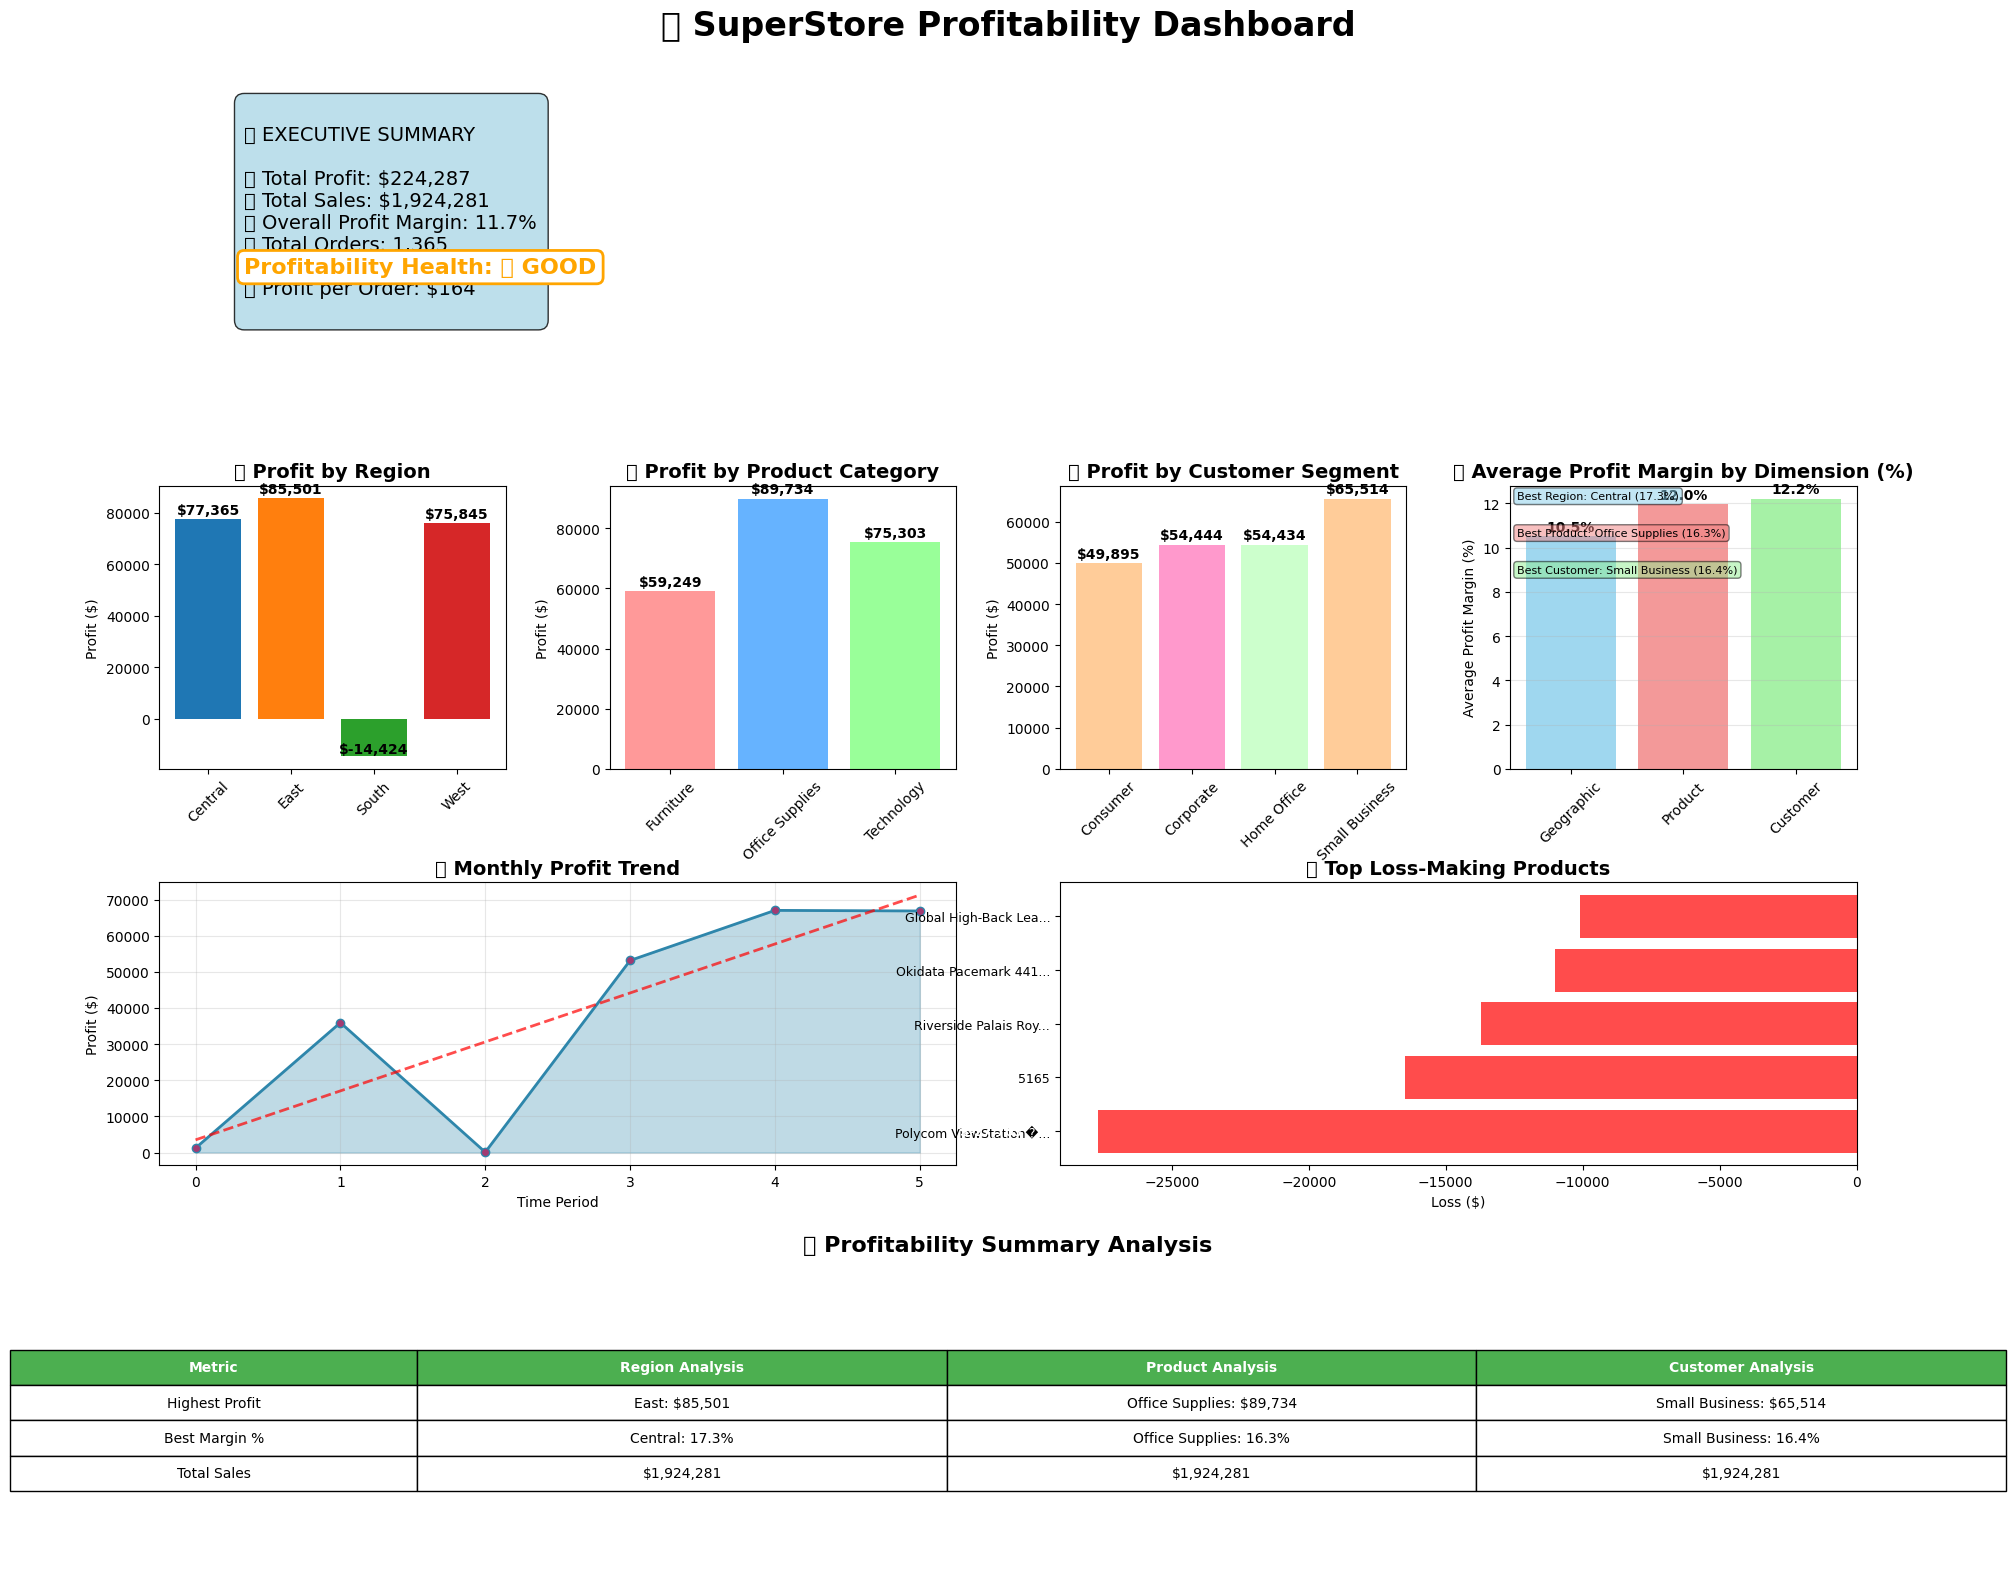

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Assuming df is already loaded with your SuperStore data
# df = pd.read_csv('SuperStoreUS.csv')

print("🏢 SUPERSTORE PROFITABILITY DASHBOARD")
print("=" * 60)

# Step 1: Prepare the data and calculate key metrics
print("Step 1: Calculating Key Profitability Metrics...")
print("-" * 40)

# Convert dates for time analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Year'] = df['Order Date'].dt.to_period('M')

# Calculate key overall metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
overall_margin = (total_profit / total_sales) * 100
avg_order_value = total_sales / total_orders
profit_per_order = total_profit / total_orders

# Calculate metrics by different dimensions
geographic_profit = df.groupby('Region').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Order ID': 'nunique'
}).round(2)
geographic_profit['Profit_Margin_%'] = (geographic_profit['Profit'] / geographic_profit['Sales'] * 100).round(1)

product_profit = df.groupby('Product Category').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Order ID': 'nunique'
}).round(2)
product_profit['Profit_Margin_%'] = (product_profit['Profit'] / product_profit['Sales'] * 100).round(1)

customer_profit = df.groupby('Customer Segment').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Order ID': 'nunique'
}).round(2)
customer_profit['Profit_Margin_%'] = (customer_profit['Profit'] / customer_profit['Sales'] * 100).round(1)

# Time-based profitability
monthly_profit = df.groupby('Month_Year').agg({
    'Profit': 'sum',
    'Sales': 'sum'
}).round(2)
monthly_profit['Profit_Margin_%'] = (monthly_profit['Profit'] / monthly_profit['Sales'] * 100).round(1)

# Identify negative profit products
negative_profit = df[df['Profit'] < 0].groupby('Product Name').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Quantity ordered new': 'sum'
}).sort_values('Profit').head(10)

print("✅ Key metrics calculated successfully!")

# =============================================================================
# CREATE THE DASHBOARD - Multiple subplots
# =============================================================================

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(20, 16))
fig.suptitle('🏢 SuperStore Profitability Dashboard', fontsize=24, fontweight='bold', y=0.98)

# =============================================================================
# SECTION 1: EXECUTIVE SUMMARY (Top Row)
# =============================================================================

# KPI Cards simulation using text boxes
ax_kpi = plt.subplot(4, 4, (1, 4))
ax_kpi.axis('off')

# Create KPI display
kpi_text = f"""
📊 EXECUTIVE SUMMARY

💰 Total Profit: ${total_profit:,.0f}
💵 Total Sales: ${total_sales:,.0f}
📈 Overall Profit Margin: {overall_margin:.1f}%
🛒 Total Orders: {total_orders:,}
💳 Average Order Value: ${avg_order_value:.0f}
💎 Profit per Order: ${profit_per_order:.0f}
"""

ax_kpi.text(0.05, 0.95, kpi_text, transform=ax_kpi.transAxes, fontsize=14,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

# Add profit health indicator
if overall_margin >= 15:
    health_status = "🟢 EXCELLENT"
    health_color = "green"
elif overall_margin >= 10:
    health_status = "🟡 GOOD"
    health_color = "orange"
else:
    health_status = "🔴 NEEDS IMPROVEMENT"
    health_color = "red"

ax_kpi.text(0.05, 0.35, f"Profitability Health: {health_status}", transform=ax_kpi.transAxes, 
            fontsize=16, fontweight='bold', color=health_color,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor=health_color, linewidth=2))

# =============================================================================
# SECTION 2: GEOGRAPHIC PROFITABILITY (Row 2, Left)
# =============================================================================

ax_geo = plt.subplot(4, 4, 5)
bars_geo = ax_geo.bar(geographic_profit.index, geographic_profit['Profit'], 
                      color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax_geo.set_title('💰 Profit by Region', fontsize=14, fontweight='bold')
ax_geo.set_ylabel('Profit ($)')
ax_geo.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars_geo):
    height = bar.get_height()
    ax_geo.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# =============================================================================
# SECTION 3: PRODUCT CATEGORY PROFITABILITY (Row 2, Right)
# =============================================================================

ax_prod = plt.subplot(4, 4, 6)
bars_prod = ax_prod.bar(product_profit.index, product_profit['Profit'], 
                        color=['#ff9999', '#66b3ff', '#99ff99'])
ax_prod.set_title('📦 Profit by Product Category', fontsize=14, fontweight='bold')
ax_prod.set_ylabel('Profit ($)')
ax_prod.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars_prod):
    height = bar.get_height()
    ax_prod.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                 f'${height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# =============================================================================
# SECTION 4: CUSTOMER SEGMENT PROFITABILITY (Row 2, Far Right)
# =============================================================================

ax_cust = plt.subplot(4, 4, 7)
colors_cust = ['#ffcc99', '#ff99cc', '#ccffcc']
bars_cust = ax_cust.bar(customer_profit.index, customer_profit['Profit'], color=colors_cust)
ax_cust.set_title('👥 Profit by Customer Segment', fontsize=14, fontweight='bold')
ax_cust.set_ylabel('Profit ($)')
ax_cust.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars_cust:
    height = bar.get_height()
    ax_cust.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                 f'${height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# =============================================================================
# SECTION 5: PROFIT MARGIN COMPARISON (Row 2, Far Right)
# =============================================================================

ax_margin = plt.subplot(4, 4, 8)

# Create a combined comparison of average margins by dimension
avg_margins = {
    'Geographic': geographic_profit['Profit_Margin_%'].mean(),
    'Product': product_profit['Profit_Margin_%'].mean(),
    'Customer': customer_profit['Profit_Margin_%'].mean()
}

categories = list(avg_margins.keys())
margins = list(avg_margins.values())
colors = ['skyblue', 'lightcoral', 'lightgreen']

bars_margin = ax_margin.bar(categories, margins, color=colors, alpha=0.8)
ax_margin.set_title('📊 Average Profit Margin by Dimension (%)', fontsize=14, fontweight='bold')
ax_margin.set_ylabel('Average Profit Margin (%)')
ax_margin.tick_params(axis='x', rotation=45)
ax_margin.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars_margin):
    height = bar.get_height()
    ax_margin.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add best performer annotations
best_region = geographic_profit['Profit_Margin_%'].idxmax()
best_product = product_profit['Profit_Margin_%'].idxmax()
best_customer = customer_profit['Profit_Margin_%'].idxmax()

ax_margin.text(0.02, 0.98, f'Best Region: {best_region} ({geographic_profit.loc[best_region, "Profit_Margin_%"]:.1f}%)', 
               transform=ax_margin.transAxes, fontsize=8, verticalalignment='top',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="skyblue", alpha=0.5))
ax_margin.text(0.02, 0.85, f'Best Product: {best_product} ({product_profit.loc[best_product, "Profit_Margin_%"]:.1f}%)', 
               transform=ax_margin.transAxes, fontsize=8, verticalalignment='top',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.5))
ax_margin.text(0.02, 0.72, f'Best Customer: {best_customer} ({customer_profit.loc[best_customer, "Profit_Margin_%"]:.1f}%)', 
               transform=ax_margin.transAxes, fontsize=8, verticalalignment='top',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))

# =============================================================================
# SECTION 6: MONTHLY PROFIT TREND (Row 3, Span 2 columns)
# =============================================================================

ax_trend = plt.subplot(4, 4, (9, 10))
monthly_profit_values = monthly_profit['Profit'].values
monthly_periods = range(len(monthly_profit))

ax_trend.plot(monthly_periods, monthly_profit_values, marker='o', linewidth=2, 
              markersize=6, color='#2E86AB', markerfacecolor='#A23B72')
ax_trend.fill_between(monthly_periods, monthly_profit_values, alpha=0.3, color='#2E86AB')
ax_trend.set_title('📈 Monthly Profit Trend', fontsize=14, fontweight='bold')
ax_trend.set_ylabel('Profit ($)')
ax_trend.set_xlabel('Time Period')
ax_trend.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(monthly_periods, monthly_profit_values, 1)
p = np.poly1d(z)
ax_trend.plot(monthly_periods, p(monthly_periods), "--", color='red', alpha=0.7, linewidth=2)

# =============================================================================
# SECTION 7: TOP LOSS-MAKING PRODUCTS (Row 3, Right)
# =============================================================================

ax_loss = plt.subplot(4, 4, (11, 12))
if len(negative_profit) > 0:
    top_losses = negative_profit.head(5)
    bars_loss = ax_loss.barh(range(len(top_losses)), top_losses['Profit'], color='red', alpha=0.7)
    ax_loss.set_title('🔴 Top Loss-Making Products', fontsize=14, fontweight='bold')
    ax_loss.set_xlabel('Loss ($)')
    ax_loss.set_yticks(range(len(top_losses)))
    ax_loss.set_yticklabels([name[:20] + '...' if len(name) > 20 else name 
                             for name in top_losses.index], fontsize=9)
    
    # Add value labels
    for i, bar in enumerate(bars_loss):
        width = bar.get_width()
        ax_loss.text(width - abs(width)*0.1, bar.get_y() + bar.get_height()/2,
                     f'${width:,.0f}', ha='right', va='center', fontsize=9, color='white', fontweight='bold')
else:
    ax_loss.text(0.5, 0.5, 'No Loss-Making Products Found', ha='center', va='center', 
                 transform=ax_loss.transAxes, fontsize=12)
    ax_loss.set_title('🔴 Top Loss-Making Products', fontsize=14, fontweight='bold')

# =============================================================================
# SECTION 8: PROFITABILITY SUMMARY TABLE (Row 4, Span all columns)
# =============================================================================

ax_table = plt.subplot(4, 4, (13, 16))
ax_table.axis('off')

# Create summary table data
table_data = []
table_data.append(['Metric', 'Region Analysis', 'Product Analysis', 'Customer Analysis'])
table_data.append(['Highest Profit', 
                   f"{geographic_profit['Profit'].idxmax()}: ${geographic_profit['Profit'].max():,.0f}",
                   f"{product_profit['Profit'].idxmax()}: ${product_profit['Profit'].max():,.0f}",
                   f"{customer_profit['Profit'].idxmax()}: ${customer_profit['Profit'].max():,.0f}"])
table_data.append(['Best Margin %', 
                   f"{geographic_profit['Profit_Margin_%'].idxmax()}: {geographic_profit['Profit_Margin_%'].max():.1f}%",
                   f"{product_profit['Profit_Margin_%'].idxmax()}: {product_profit['Profit_Margin_%'].max():.1f}%",
                   f"{customer_profit['Profit_Margin_%'].idxmax()}: {customer_profit['Profit_Margin_%'].max():.1f}%"])
table_data.append(['Total Sales', 
                   f"${geographic_profit['Sales'].sum():,.0f}",
                   f"${product_profit['Sales'].sum():,.0f}",
                   f"${customer_profit['Sales'].sum():,.0f}"])

# Create table
table = ax_table.table(cellText=table_data[1:], colLabels=table_data[0], 
                       cellLoc='center', loc='center',
                       colWidths=[0.2, 0.26, 0.26, 0.26])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)

# Style the table
for i in range(len(table_data[0])):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax_table.set_title('📋 Profitability Summary Analysis', fontsize=16, fontweight='bold', pad=20)

# =============================================================================
# FINAL ADJUSTMENTS
# =============================================================================

plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)

# Print summary insights
print("\n" + "="*60)
print("🔍 KEY PROFITABILITY INSIGHTS")
print("="*60)
print(f"💡 Overall Business Health: Profit Margin of {overall_margin:.1f}%")
print(f"🏆 Most Profitable Region: {geographic_profit['Profit'].idxmax()} (${geographic_profit['Profit'].max():,.0f})")
print(f"📦 Most Profitable Product Category: {product_profit['Profit'].idxmax()} (${product_profit['Profit'].max():,.0f})")
print(f"👥 Most Profitable Customer Segment: {customer_profit['Profit'].idxmax()} (${customer_profit['Profit'].max():,.0f})")
print(f"🔴 Products with Losses: {len(negative_profit)} products generating negative profit")
print(f"📈 Average Monthly Profit: ${monthly_profit['Profit'].mean():,.0f}")

# Recommendations
print("\n" + "="*60)
print("💼 STRATEGIC RECOMMENDATIONS")
print("="*60)

if overall_margin < 10:
    print("🚨 URGENT: Overall profit margin is below 10%. Focus on cost reduction and pricing optimization.")
elif overall_margin < 15:
    print("⚠️  ATTENTION: Profit margin is moderate. Consider optimization strategies.")
else:
    print("✅ GOOD: Healthy profit margins. Focus on scaling successful segments.")

print(f"🎯 Focus on {geographic_profit['Profit'].idxmax()} region for expansion")
print(f"📦 Invest more in {product_profit['Profit'].idxmax()} product category")
print(f"👥 Target {customer_profit['Profit'].idxmax()} customer segment for retention")

if len(negative_profit) > 0:
    print(f"🔧 Review and optimize the {len(negative_profit)} loss-making products")

plt.show()

# Optional: Save the dashboard
# plt.savefig('superstore_profitability_dashboard.png', dpi=300, bbox_inches='tight')
# print("\n📊 Dashboard saved as 'superstore_profitability_dashboard.png'")

[['Metric', 'Region Analysis', 'Product Analysis', 'Customer Analysis'],
 ['Highest Profit',
  'East: $85,501',
  'Office Supplies: $89,734',
  'Small Business: $65,514'],
 ['Best Margin %',
  'Central: 17.3%',
  'Office Supplies: 16.3%',
  'Small Business: 16.4%'],
 ['Total Sales', '$1,924,281', '$1,924,281', '$1,924,281']]